#1.Montar Google Drive en Google colaboratory 

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#2.Importando librerías necesarias.

In [30]:
import cv2                                  #libreria de opencv
import numpy as np                          #libreria para manejo de arrays 
from matplotlib import pyplot as plt        #libreria para visualizar graficos y otros
from google.colab.patches import cv2_imshow #modulo para visualizar imagenes en google colaboratory

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#3.Cargando y visualizando imagenes

Image Dimensiones  :  (384, 400, 3)
Alto:  384 ,Ancho:  400 Número de canales: 3


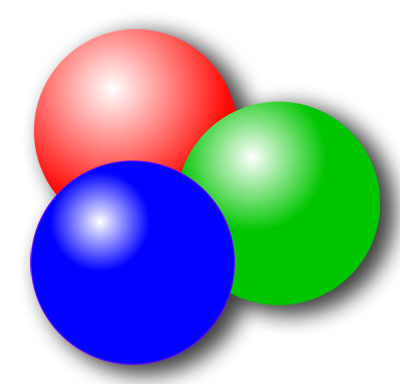

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/coputer vision /Images/imagen1.jpg")
if img.size == 0:
  print("Error: la imagen no fue cargada con exito.")
else:
  print('Image Dimensiones  : ',img.shape)
  print("Alto: ",str(img.shape[0]),",Ancho: ",img.shape[1],"Número de canales:",img.shape[2])
  cv2_imshow(img)

#4.Aplicando filtros

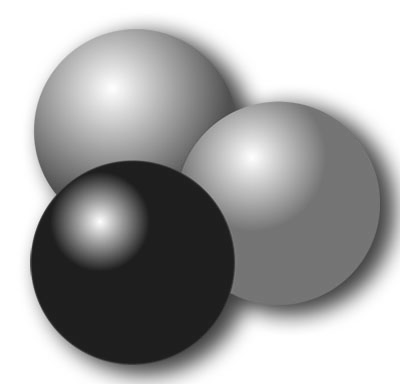

In [ ]:
#convirtiendo la imagen a escala de grises
processed_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#guardando la imagen en drive
#cv2.imwrite('/content/drive/My Drive/IA/Computer_Vision/Images/image1_processed_gray.png', processed_image)
cv2_imshow(processed_image)

##channels colors

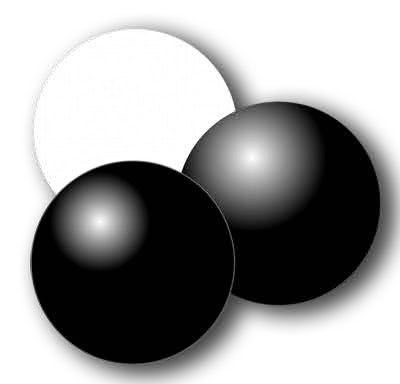

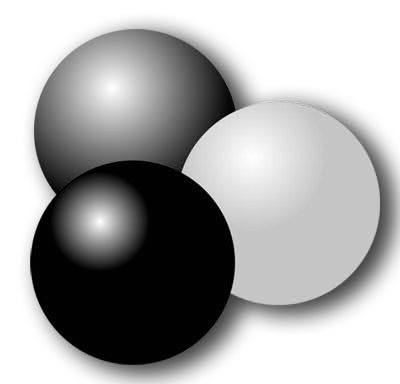

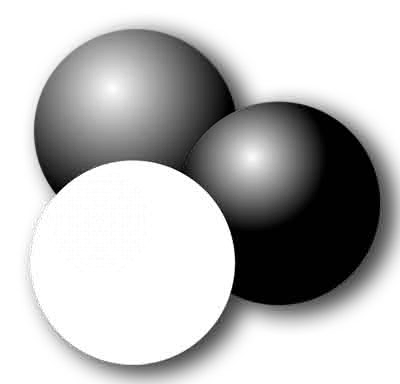

In [ ]:
#extrayendo el canal rojo (RED channel)
red_channel = img[:,:,2]
#extrayendo el canal verde (Green channel)
green_channel = img[:,:,1]
#extrayendo el canal azul (blue channel)
blue_channel = img[:,:,0]
#cv2.imwrite('/content/drive/My Drive/IA/Computer_Vision/Images/image1_processed_red.png', red_channel)
#cv2.imwrite('/content/drive/My Drive/IA/Computer_Vision/Images/image1_processed_green.png', green_channel)
#cv2.imwrite('/content/drive/My Drive/IA/Computer_Vision/Images/image1_processed_blue.png', blue_channel)
cv2_imshow(red_channel)
cv2_imshow(green_channel)
cv2_imshow(blue_channel)


##Resaltado de un color (ejemplo el rojo)

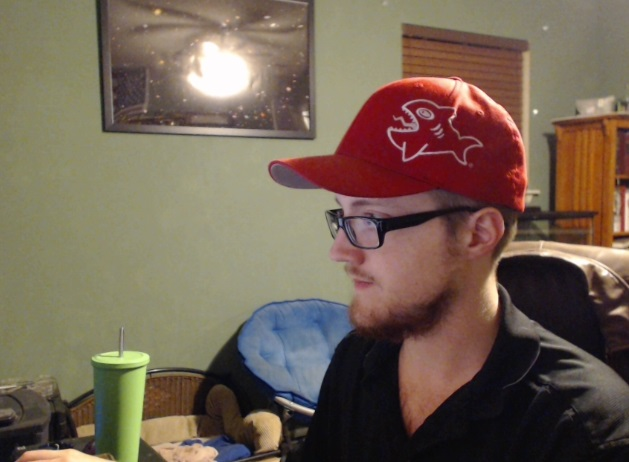

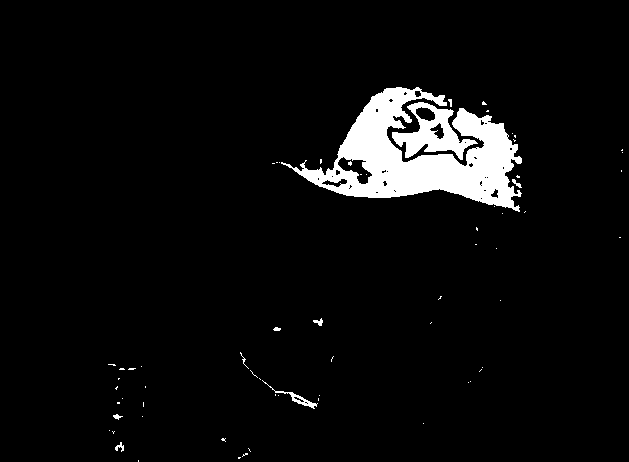

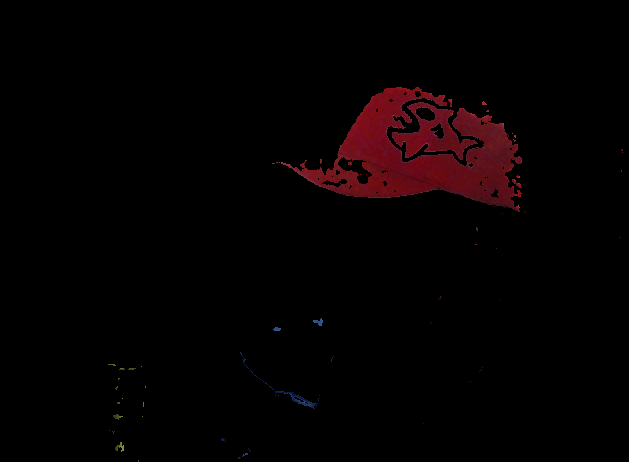

In [ ]:
#Cargamos la imagen de la que queremos reslartar el rojo
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/coputer vision /Images/imagen2.jpg")
#convertimos la imagen a gris
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_red = np.array([30,150,50]) # codigo minimo del rojo en del B,G,R
upper_red = np.array([255,255,180]) # codigo maximo del rojo en B,G,R
#Creamos una mascara de la imagen donde resaltaremos el color rojo
mask_red = cv2.inRange(hsv, lower_red, upper_red) 
#aplicamos la mascara en la imagen
img_result = cv2.bitwise_and(img,img, mask = mask_red)
#visualizamos la imagen
cv2_imshow(img)
cv2_imshow(mask_red)
cv2_imshow(img_result)

##Gradiente de Imágenes

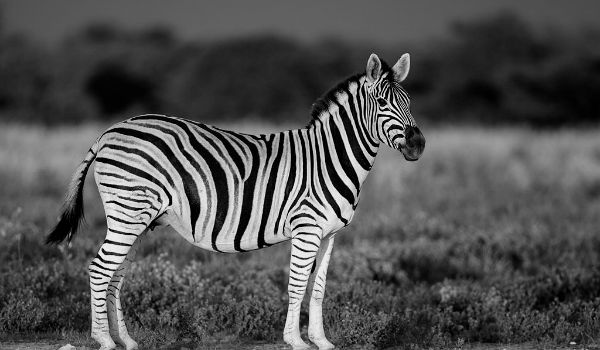

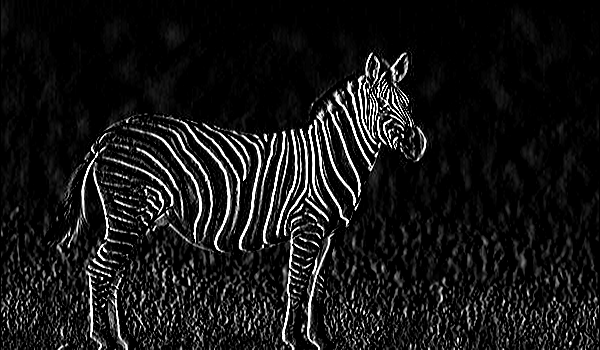

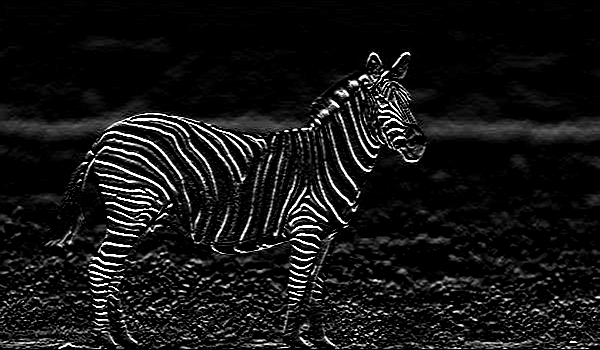

In [ ]:
# cargamos la imagen y la pasamos de una a gris
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/coputer vision /Images/cebra.jpg",0)
#cambiar CV_64F  por CV_8U, si quiere verlo en negro/blanco
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
cv2_imshow(img)
cv2_imshow(sobelx)
cv2_imshow(sobely)

##Gradiente mejorado

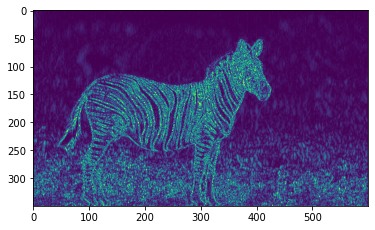

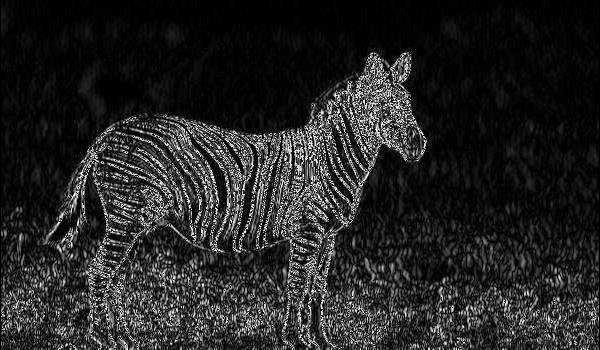

In [ ]:
sobelx8u=cv2.Sobel(img,cv2.CV_8U,1,0,ksize=3)
#Utilizando cv2.CV_64F. Luego toma el valor absoluto y hace la conversión a cv2.CV_8U
sobelx64f=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
abs_sobel64f=np.absolute(sobelx64f)
sobel_8u=np.uint8(abs_sobel64f)
plt.imshow(sobel_8u)
plt.show()
cv2_imshow(sobel_8u)

##Detector de bordes Canny, cv2.Canny ()


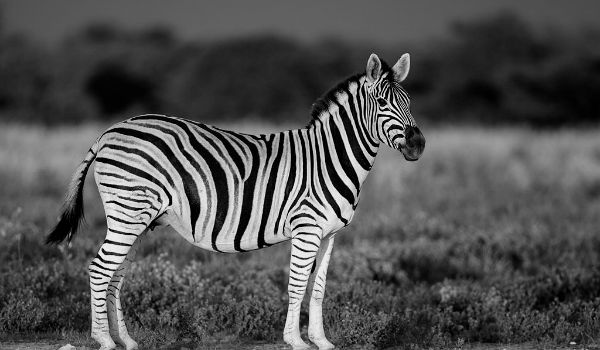

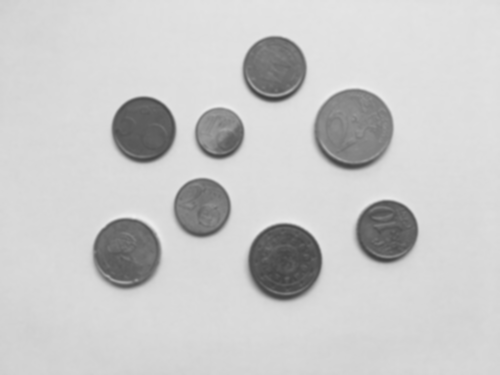

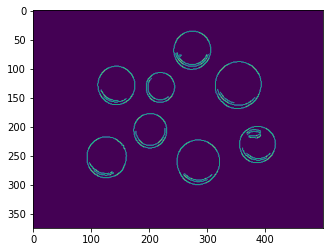

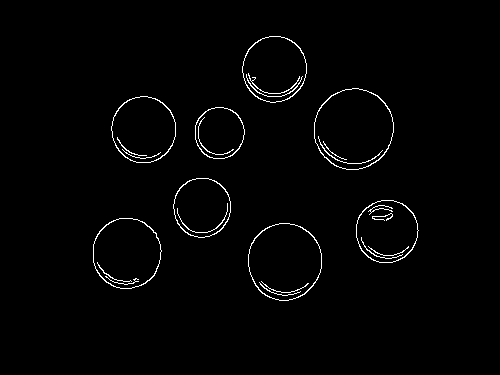

In [ ]:
img_gris = cv2.imread("/content/drive/MyDrive/Colab Notebooks/coputer vision /Images/coins.jpg",0)
cv2_imshow(img)
#Aplicamos un filtro gausiano para suavizar la imagen
img_gauss = cv2.GaussianBlur(img_gris, (5,5), 0)
cv2_imshow(img_gauss)
img_canny = cv2.Canny(img_gauss, 50, 150)
plt.imshow(img_canny)
plt.show()
cv2_imshow(img_canny)

In [ ]:
contornos,_=cv2.findContours(img_canny.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print("He encontrado {} objetos".format(len(contornos)))


He encontrado 8 objetos


[[ 58  26 108 108]]


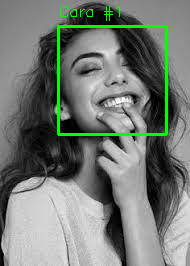

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/harcascade/haarcascade_frontalface_default.xml');
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/coputer vision /Images/descarga.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray)
print(faces)
idx=0
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
  idx += 1
  cv2.putText(img,"Cara #{}".format(idx),(x,y-10),
  cv2.FONT_HERSHEY_SIMPLEX,.5,(0,255,0),1)
cv2_imshow(img)
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/coputer vision /Images/caras_detectadas.jpg',img)

In [34]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [35]:
face_cascade= cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/harcascade/haarcascade_fullbody.xml');
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/coputer vision /Images/descarga(1).jpg")
grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

error: ignored

In [36]:
faces = face_cascade.detectMultiScale(grayimg,scaleFactor=1.1,minNeighbors=5)
print(faces)

NameError: ignored

In [32]:
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(200,255,100),2)
cv2_imshow(img)  

AttributeError: ignored

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/drive/MyDrive/Colab Notebooks/coputer vision /Images/familia_cantando.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#video que analizaremos
videoentrada = cv2.VideoCapture('/content/drive/MyDrive/Colab Notebooks/coputer vision /Images/familia_cantando.mp4')

In [ ]:
property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
totalframes = int(cv2.VideoCapture.get(videoentrada, property_id))
print( "total de frames: "+str(totalframes) )
print(str(videoentrada.get(3))+" X "+str(videoentrada.get(4))+" pixeles")

total de frames: 1412
640.0 X 360.0 pixeles


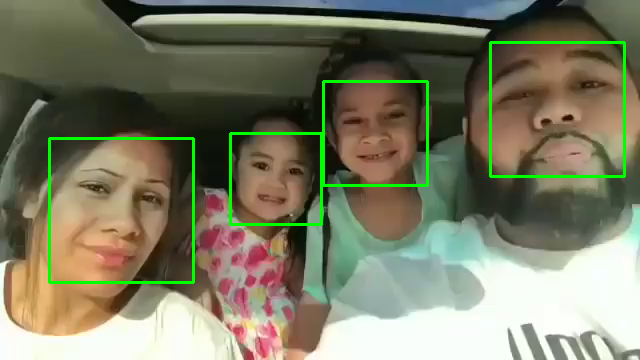

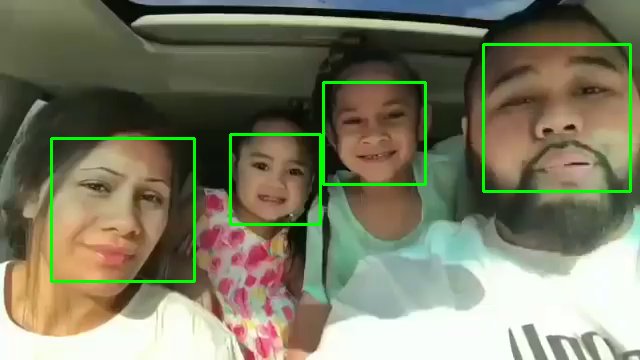

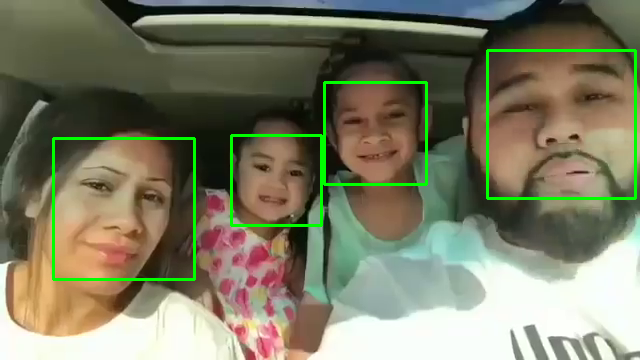

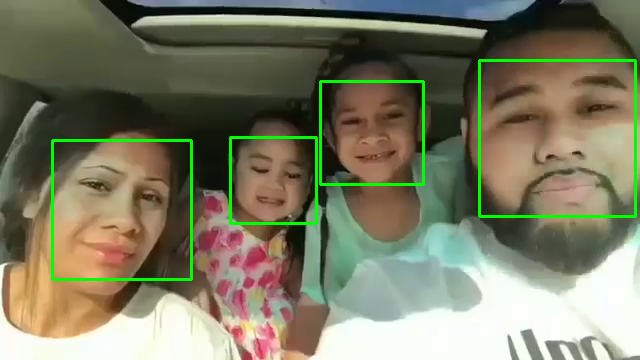

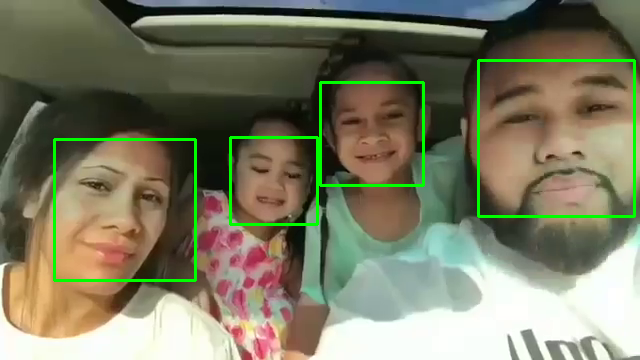

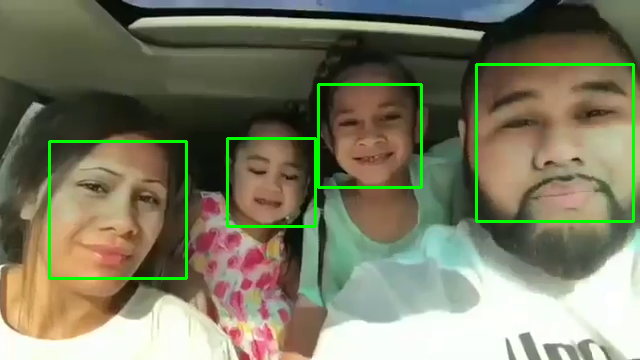

In [ ]:
#https://unipython.com/empezando-con-videos/
#recorremos los 6 primeros frames de 1412
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/harcascade/haarcascade_frontalface_default.xml')
for x in range(6):
  videoentrada.set(1,x);   
  #ret: retorno (true si es frame se lee correctamente)
  ret, frame = videoentrada.read()
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5,minSize=(30, 30))
  for (x, y, w, h) in faces:
    cv2.rectangle(frame,(x,y),(x+w, y+h),(0, 255, 0),2)
    #roi_gray = gray[y:y+h,x:x+w]
    #roi_color = frame[y:y+h,x:x+w]
  cv2_imshow(frame)

In [ ]:
while(videoentrada.isOpened()):
  ret, frame = videoentrada.read()
  if ret == True:
    # Nuestras operaciones sobre los frames se hacen aqui
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  else:
    break  
videoentrada.release()

In [ ]:
# instalar librería para visualizar el progreso de ejecución una tarea en background
pip install pyprind

In [ ]:
import sys
import time          #  calcular tiempo (en este caso tiempo de descarga de archivo)
import pyprind
#funcion para ver el avance de procesos en background
def reporthook(step, total_step):
    global start_time
    if step == 0:
        start_time = time.time()
        return
    duration = time.time() - start_time
    speed = total_step / (1024.**2 * duration)
    percent = step *100 /total_step
    sys.stdout.write("\r%d pasos | %d frames -> %%.2f frames | %d segundos transcurrido" %
                    (step, total_step, percent, duration))
    sys.stdout.flush()

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/IA/Computer_Vision/Python_files/HaarCascade/haarcascade_frontalface_default.xml')
#video que analizaremos
videoentrada = cv2.VideoCapture('/content/drive/My Drive/IA/Computer_Vision/Images/familia_cantando.mp4')
#video resultante del análisis, definimos el codec DIVX
codec = cv2.VideoWriter_fourcc(*'DIVX')
# Definimos el fps = 20.0 y el tamaño de cada frame (640x360)
videosalida = cv2.VideoWriter('/content/drive/My Drive/IA/Computer_Vision/Images/familia_cantando_haar2.avi',
                              codec, 20.0,(640,360))
framenum=0
while (videoentrada.isOpened()):
  ret, frame = videoentrada.read()
  if ret == True:
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
    for (x,y,w,h) in faces:
      cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    videosalida.write(frame)
    reporthook(framenum, 1412)
    framenum=framenum+1
  else: break
videoentrada.release()
videosalida.release()

1411 pasos | 1412 frames -> 99.93 frames | 232 segundos transcurrido